In [1]:
from typing import List, Tuple
from wand.image import Image as WImage

# Лабораторная работа 2. Методы поиска 
 Вариант 9

## Описание алгоритмов
### Метод Ньютона
Чтобы численно решить уравнение f ( x ) = 0 методом простой итерации, его необходимо привести к эквивалентному уравнению: x = φ ( x ), где φ — сжимающее отображение.

Для наилучшей сходимости метода в точке очередного приближения x' должно выполняться условие φ ′ ( x ' ) = 0. Решение данного уравнения ищут в виде φ ( x ) = x + α ( x ) f ( x ), тогда:

    φ′(x') = 1 + α′(x')f(x') + α(x')f′(x') = 0.

В предположении, что точка приближения «достаточно близка» к корню x~ и что заданная функция непрерывна ( f ( x ∗ ) ≈ f ( x ~ ) = 0 ), окончательная формула для α ( x ) такова:

    α(x) = −1 / (f′(x)).

С учётом этого функция φ ( x ) определяется:

    φ(x) = x − (f(x) / f′(x)). 

При некоторых условиях эта функция в окрестности корня осуществляет сжимающее отображение. 

### Алгоритм Бойера — Мура — Хорспула
1. Сканирование слева направо, сравнение в режиме «чёрного ящика». Как и в примитивном алгоритме, совмещается начало текста и шаблона, проводится сравнение обычной процедурой «сравнить участки памяти». Если все символы шаблона совпали с наложенными символами строки, значит, подстрока найдена, и поиск окончен.

Если же какой-то символ шаблона не совпадает с соответствующим символом строки, шаблон сдвигается на несколько символов вправо. Эти «несколько» выбираются в соответствии с изменённой эвристикой стоп-символа.

2. Изменённая эвристика стоп-символа. Берём символ текста, оказавшийся над последним символом шаблона (независимо от того, где случилось несовпадение!). Сдвигаем шаблон так, чтобы под стоп-символом оказалась буква шаблона. Это реализуется с помощью таблицы смещений: для каждого символа алфавита храним максимально возможный сдвиг, не пропускающий стоп-символ. Для символов, не вошедших в шаблон, величина смещения устанавливается равной длине шаблона. Последний символ шаблона при вычислении таблицы смещений не рассматривается (чревато зацикливанием). 

## Достоинства и недостатки
### Алгоритм Бойера — Мура — Хорспула
Достоинства алгоритма:

    -- простота реализации
    -- высокая эффективность
    -- Использует стандартную функцию сравнения участков памяти, как правило, оптимизированную на ассемблерном уровне под конкретный процессор.
    
Недостатки:

    -- необходима дополнительная память
    -- не модифицируется на приблизительный поиск, одновременный поиск нескольких строк.

### Метод Ньютона
Достоинства алгоритма:
    
    -- простота реализации
 
Недостатки:

    -- медленная скорость сходимости

## Псевдокод алгоритма Бойера — Мура — Хорспула
### Pre-processing
```
compute the length(n) of the given text t
compute the length(m) of the pattern p
if the length of m is even:
    divide the pattern into two equal
    halves of p1 and p2 with respective length m1 and m2
else:
    divide the pattern using (m.length() + 1)/2
```
### Searching
```
for (i=0 to n-m) && (j=0 to j<m2)
    if (i0 letter of pattern(p2) != t0 letter of text(t)):
        break
    if (i0 letter of pattern(p2) == t0 letter of text(t)):
        print (index of rightmost character of p2)
for (i=index of rightmost character of p2) && (j=index of rightmost character of p2):
    if (p1 != text(t)):
        break
    else
        print ( Pattern not found)
```
## Псевдокод Метода Ньютона
```
Set an initial guess x0
Set the number of steps n(max)
Set n=1
do:
    x(n+1) = x(n) - ( f(x(n)) / f'(x(n)) )
    n = n + 1
while n <= n(max)
```

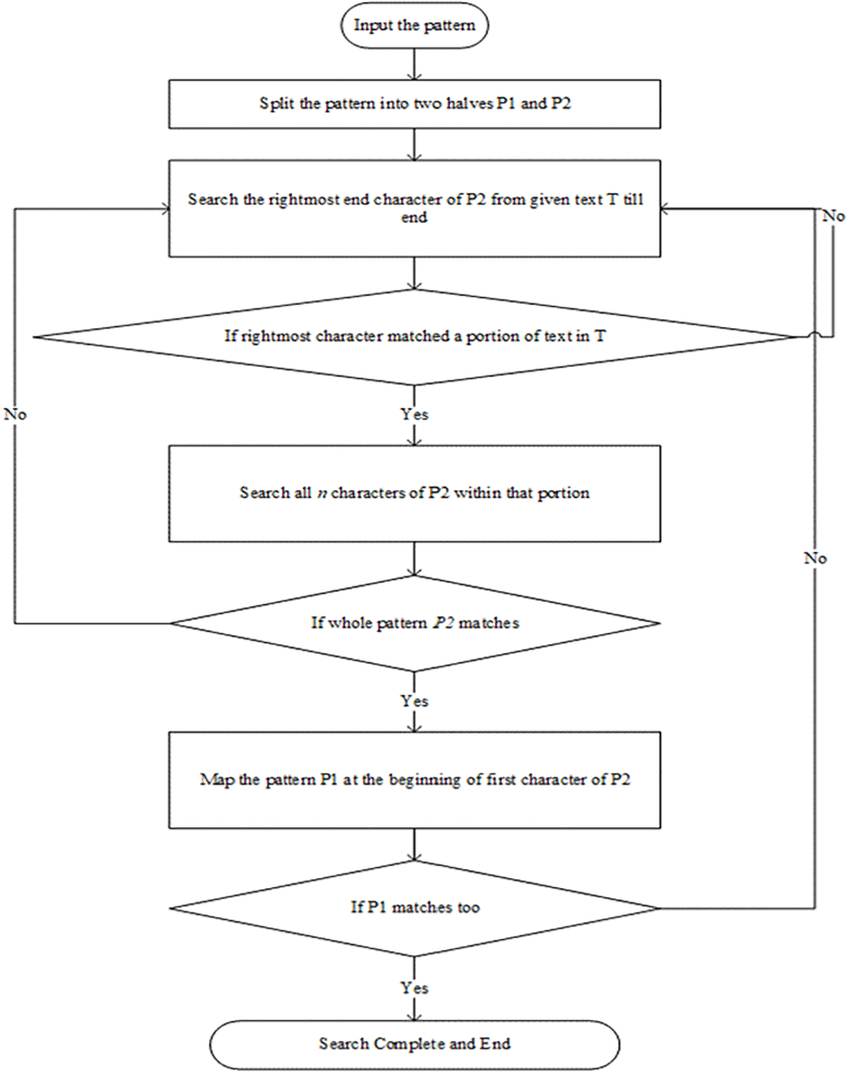

In [2]:
### Блок-схема алгоритма
img = WImage(filename='./img/scheme_boyer.png')
img

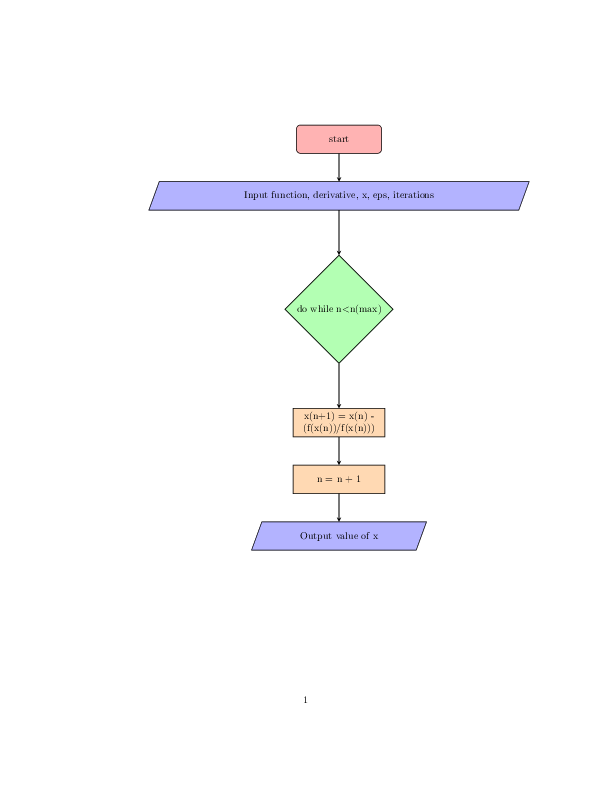

In [3]:
### Блок-схема алгоритма
img = WImage(filename='./img/test_2.pdf')
img

In [5]:
### Aлгоритм Бойера — Мура — Хорспула
def preprocess_strong_suffix(shift, bpos, pat, m):
    i = m
    j = m + 1
    bpos[i] = j
    while i > 0:
        while j <= m and pat[i - 1] != pat[j - 1]:
            if shift[j] == 0:
                shift[j] = j - i
            j = bpos[j]
        i -= 1
        j -= 1
        bpos[i] = j

def preprocess_case2(shift, bpos, pat, m):
    j = bpos[0]
    for i in range(m + 1):
        if shift[i] == 0:
            shift[i] = j
        if i == j:
            j = bpos[j]

def search(text, pat):
    s = 0
    m = len(pat)
    n = len(text)
    num = 0
    bpos = [0] * (m + 1)
    shift = [0] * (m + 1)
    preprocess_strong_suffix(shift, bpos, pat, m)
    preprocess_case2(shift, bpos, pat, m)

    while s <= n - m:
        j = m - 1
        while j >= 0 and pat[j] == text[s + j]:
            j -= 1
        if j < 0:
            num += 1
            s += shift[0]
        else:
            s += shift[j + 1]
    print(num)

f = open('mertvye-dushi.txt')
text = f.read()
pat = "Чичиков"
search(text, pat)

777


In [6]:
### Метод Ньютона
def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

In [ ]:
### Решение 1
p = lambda x: x**2 + x*4 + 2
Dp = lambda x: 2*x + 4
approx = newton(p,Dp,-4,1e-4,10)
print(approx)

In [ ]:
### Решение 2
p = lambda x: x**2 + x*4 + 2
Dp = lambda x: 2*x + 4
approx = newton(p,Dp,0,1e-4,10)
print(approx)

Для заданного квадратного уравнения меньшим из корней квадратного будет соответствовать "Решение 1" найденное с точностью до $10^{-4}$ равное -3.4142156862745097